# Local Search

CSI 4106 Introduction to Artificial Intelligence

Marcel Turcotte  
Version: Jul 11, 2025 13:56

# Preamble

## Quote of the Day

## Learning Objectives

-   **Understand** the concept and application of local search
    algorithms in optimization problems.
-   **Implement** and analyze the hill-climbing algorithm, recognizing
    its limitations such as local maxima and plateaus.
-   **Apply** effective state representation strategies in problems like
    the 8-Queens to enhance search efficiency.
-   **Explain** how simulated annealing overcomes local optima by
    allowing probabilistic acceptance of worse states.
-   **Analyze** the influence of temperature and energy difference on
    the acceptance probability in simulated annealing.
-   **Recognize** the application of simulated annealing in solving
    complex optimization problems like the Travelling Salesman Problem
    (TSP).

# Introduction

## Context

-   Focus has been on **finding paths** in **state space**.

-   Some problems prioritize the **goal state** over the **path**.

    -   Integrated-circuit design
    -   Job shop scheduling
    -   Automatic programming

The importance of the path versus the goal state hinges on the problem’s
nature. For instance, in a routing problem, the path is the critical
piece of information sought.

## 8-Queens Problem

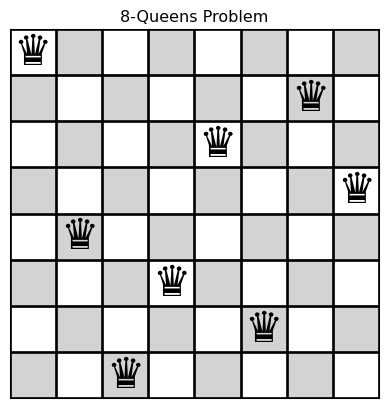

The **[8-Queens
problem](https://en.wikipedia.org/wiki/Eight_queens_puzzle)** involves
placing eight queens on an $8 \times 8$ chessboard such that **no two
queens threaten each other**, meaning no two queens share the same row,
column, or diagonal.

For an $8 \times 8$ chessboard, there exist precisely 92 distinct
solutions. Eliminating symmetry, one finds 12 fondamental solutions. In
the more general scenario of an $n \times n$ chessboard, the exact
number of solutions has been determined for all $n$ values up to and
including 27.

## Definition

> ** (Russell and Norvig 2020, 110)**
>
> **Local search algorithms** operate by searching from a **start
> state** to **neighboring states**, without keeping track of the paths,
> nor the set of states that have been reached.

Optimizes **memory utilization** while effectively solving problems in
**extensive** or **infinite state spaces**.

This algorithm lacks a systematic approach and does not ensure the
discovery of an optimal solution.

## Problem Definition

Find the “best” state according to an **objective function**, thereby
locating the **global maximum**.

This **optimization problem** is commonly referred to as **hill
climbing**.

# Hill-Climbing

## Hill-Climbing

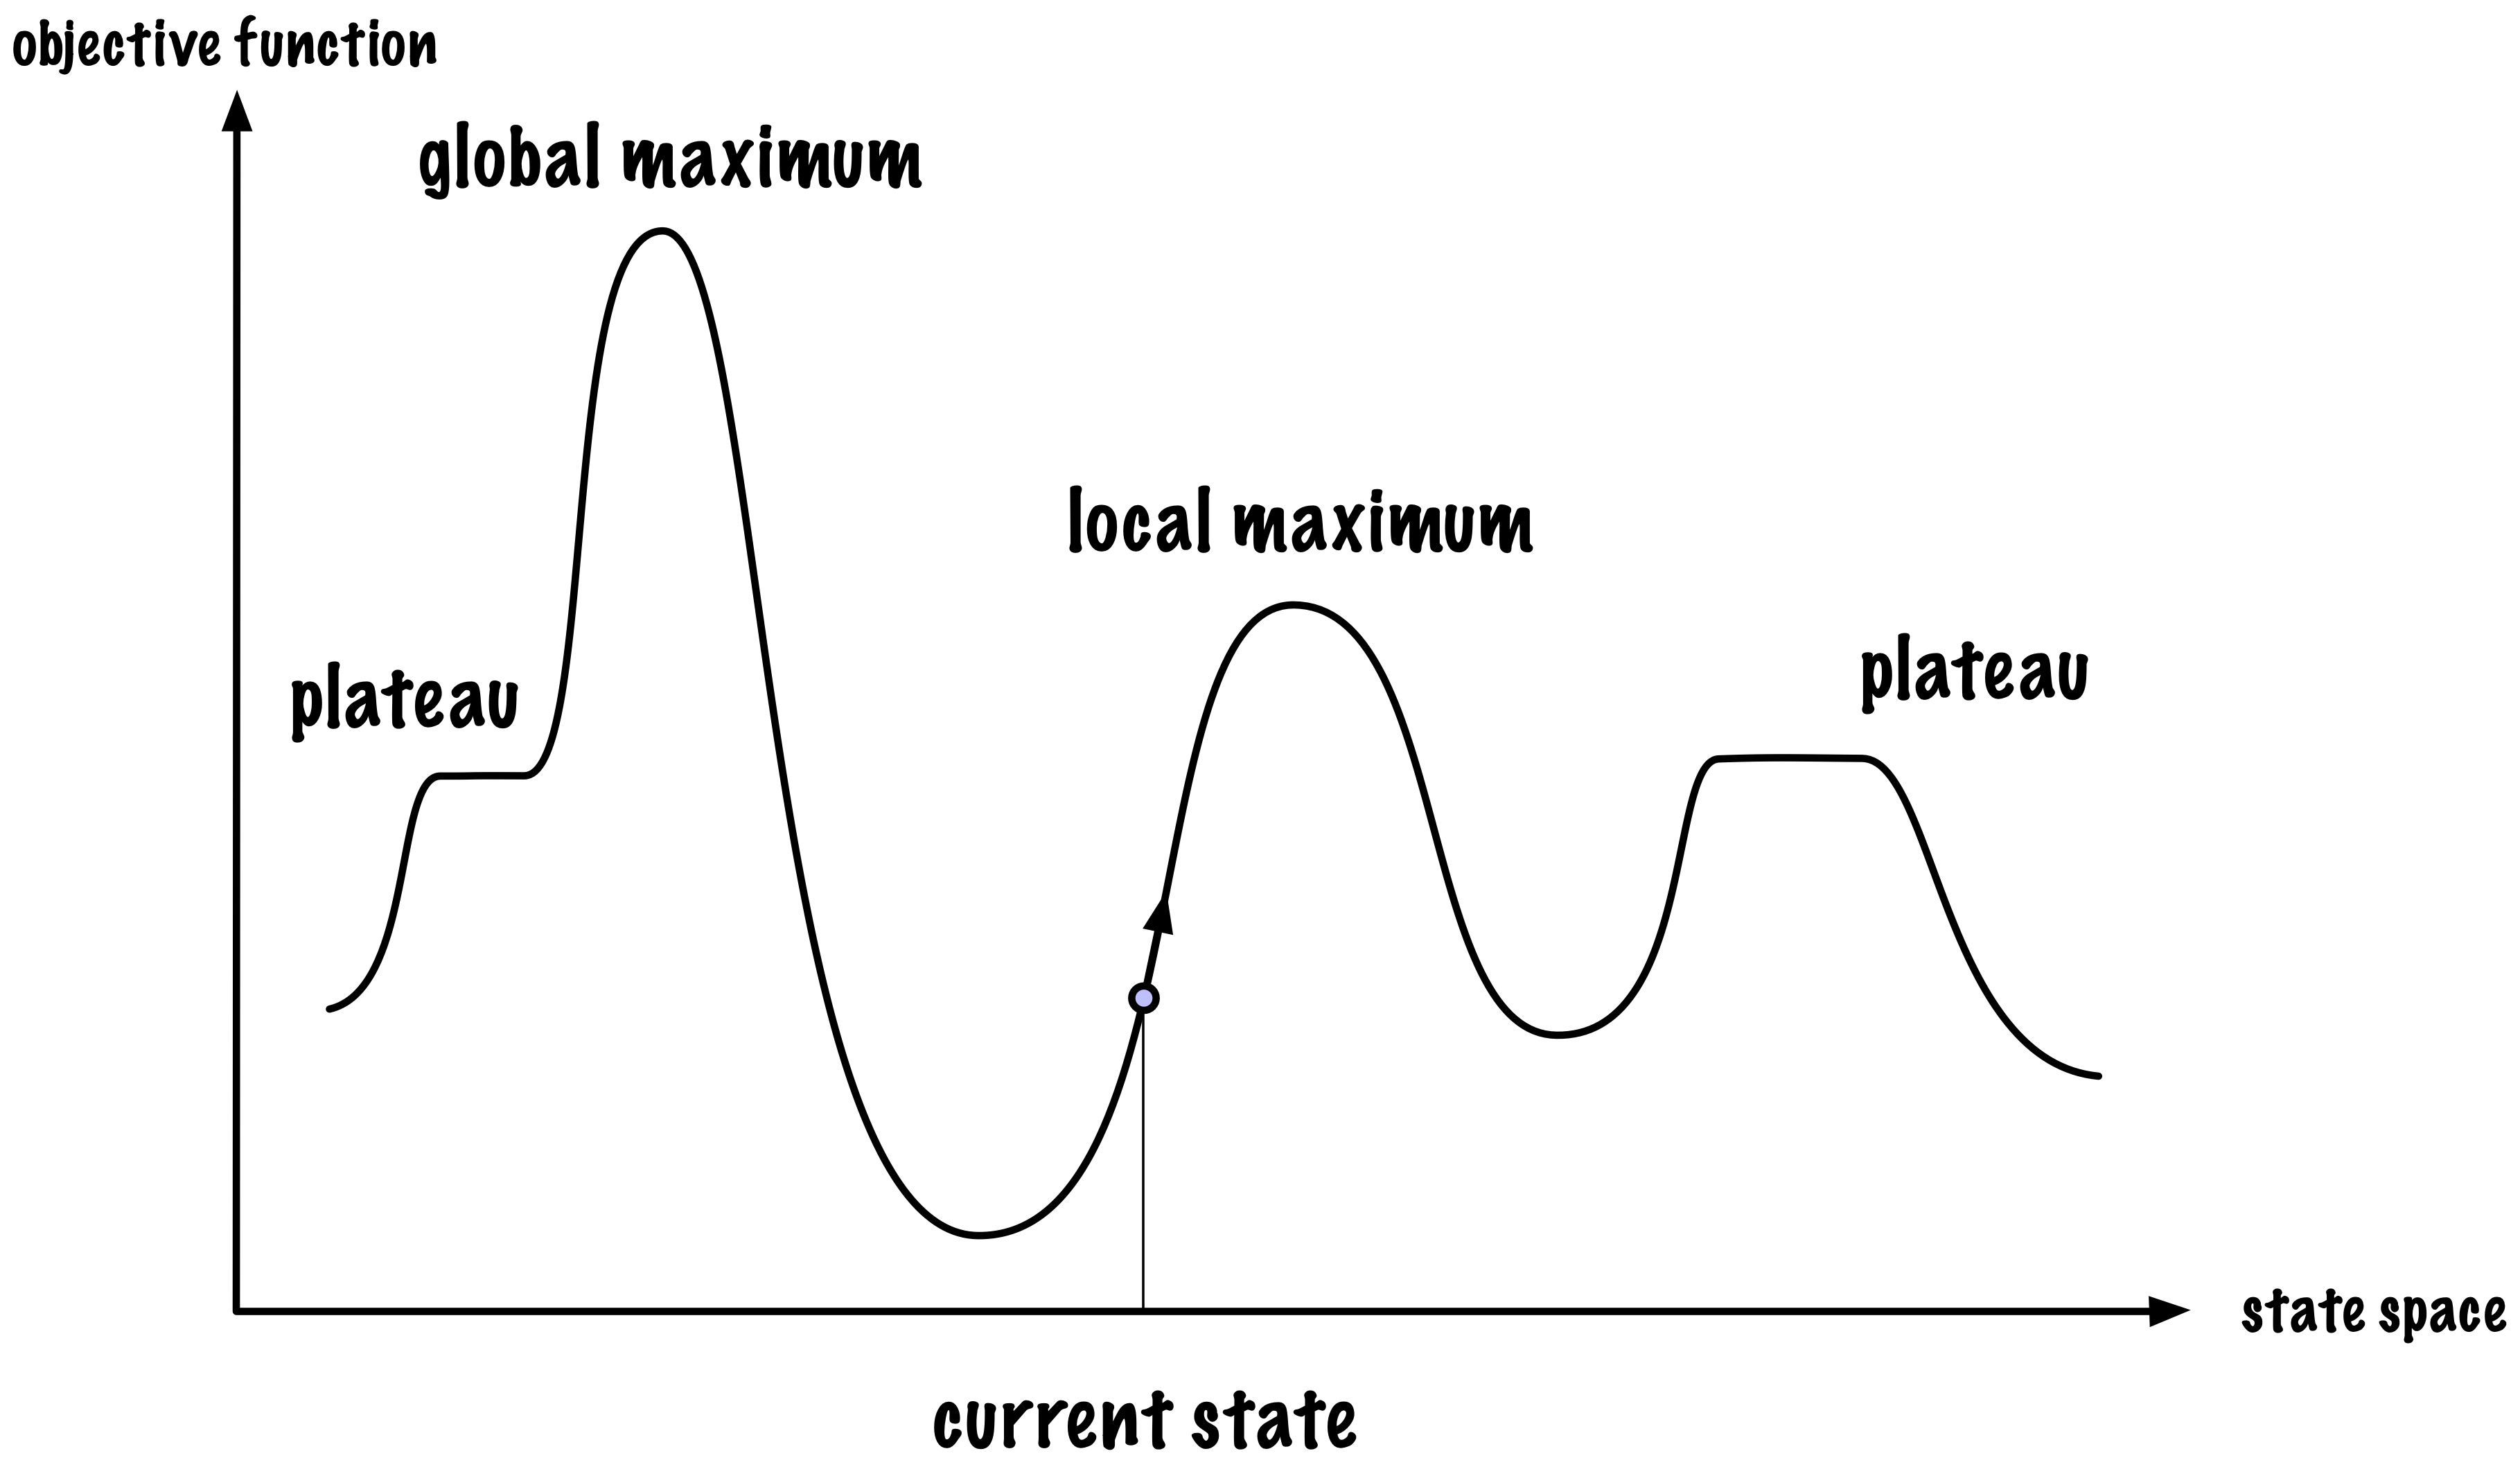

## Hill-Climbing

Given as in input a *problem*

-   *current* is the *initial state* of *problem*

-   **while** *not done* **do**

    -   *nighbour* is the highest-valued successor state of *current*
    -   if value(*neighbour*) $\le$ value(*current*) the **return**
        *current*
    -   set *current* to *neighbour*

Hill climbing neither records previously visited states nor anticipates
beyond its immediate neighbors. It keeps track of one current state
moves in the direction of the **steepest ascent**.

Notably, by inverting the sign of the objective function, the algorithm
can be adapted to seek a local minimum instead.

## 8-Queens

How would you represent the **current state**?

. . .

Why is using a grid to represent the **current state** suboptimal?

. . .

A grid representation **permits the illegal placement** of two queens in
the same column.

. . .

Instead, we can represent the state as a list ($\mathrm{state}$), where
each element corresponds to the row position of the queen in its
respective column.

In other words, $\mathrm{state}[i]$ is the row of the queen is column
$i$.

## State Representation

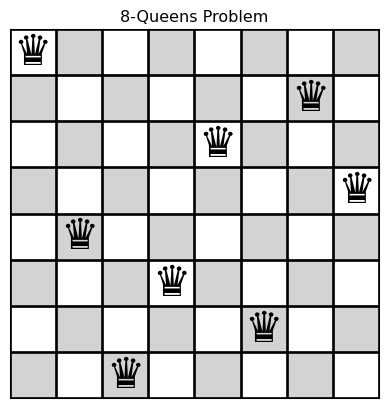

``` python
state = [0, 4, 7, 5, 2, 6, 1, 3]
```

## `create_initial_state`

In [5]:
import random
random.seed(7)

def create_initial_state(n):

    """Generates a random initial state with one queen per column."""

    return [random.randint(0, n - 1) for _ in range(n)]

**What** do you think?

## `create_initial_state`

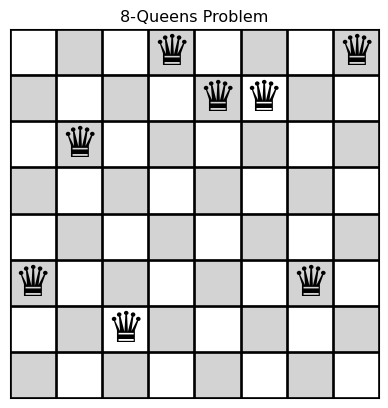

In [7]:
state 

[5, 2, 6, 0, 1, 1, 5, 0]

Permits two queens in the **same row**? **How** can this be resolved?

## Representation of 8-Queens

$8 \times 8$ chessboard.

-   **Unconstrained Placement**: $\binom{64}{8} = 4,426,165,368$
    possible configurations, representing the selection of 8 squares
    from 64.

-   **Column Constraint**: Use a list of length 8, with each entry
    indicating the row of a queen in its respective column, resulting in
    $8^8 = 16,777,216$ configurations.

-   **Row and Column Constraints**: Model board states as permutations
    of the 8 row indices, reducing configurations to $8! = 40,320$.

This underscores the significance of selecting a good representation.

## `create_initial_state`

In [8]:
import random
random.seed(7)

def create_initial_state(n):

    """Generates a permutation of numbers from 0 to n-1 as the initial state."""

    state = list(range(n))
    random.shuffle(state)

    return state

## `create_initial_state`

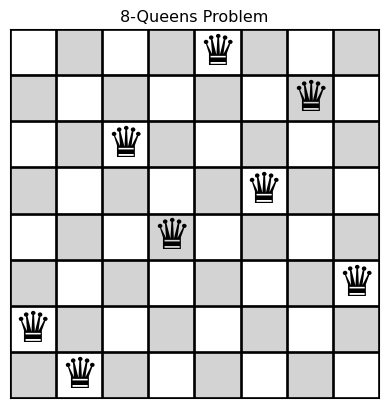

In [10]:
state 

[6, 7, 2, 4, 0, 3, 1, 5]

## `calculate_conflicts`

In [11]:
def calculate_conflicts(state):

    n = len(state)
    conflicts = 0

    for col_i in range(n):
        for col_j in range(col_i + 1, n):
            row_i = state[col_i]
            row_j = state[col_j]
            if row_i == row_j:                 # same row
                conflicts += 1
            if col_i - row_i == col_j - row_j: # same diagonal
                conflicts += 1
            if col_i + row_i == col_j + row_j: # same anti-diagonal
                conflicts += 1

    return conflicts

## `calculate_conflicts`

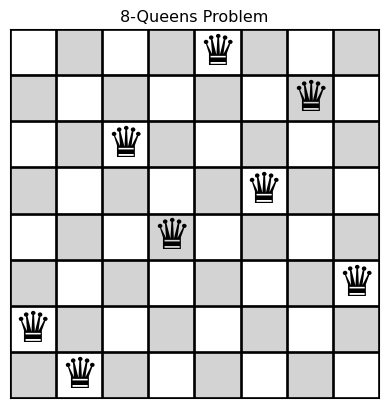

    5

## `get_neighbors_rn`

In [14]:
def get_neighbors_rn(state):

    """Generates neighboring states by moving on queen at a time to a new row."""

    neighbors = []
    n = len(state)

    for col in range(n):
        for row in range(n):
            if (state[col] != row):
              new_state = state[:] # create a copy of the state
              new_state[col] = row
              neighbors.append(new_state)

    return neighbors

Russell and Norvig (2020), $8 \times 7 = 56$ neighbours

## `get_neighbors_rn`

In [15]:
initial_state_8 = create_initial_state(8)
print(initial_state_8)
for s in get_neighbors_rn(initial_state_8):
  print(f"{s} -> # of conflicts = {calculate_conflicts(s)}")

[3, 2, 7, 1, 6, 0, 4, 5]
[0, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[1, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 6
[2, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 6
[4, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 6
[5, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 7
[6, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[7, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 0, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 1, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 3, 7, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 4, 7, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 5, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 6, 7, 1, 6, 0, 4, 5] -> # of conflicts = 6
[3, 7, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 2, 0, 1, 6, 0, 4, 5] -> # of conflicts = 9
[3, 2, 1, 1, 6, 0, 4, 5] -> # of conflicts = 8
[3, 2, 2, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 2, 3, 1, 6, 0, 4, 5] -> # of conflicts = 8
[3, 2, 4, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 2, 5, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 2, 6, 1, 6, 0, 4, 5] -> # of co

## `get_neighbors`

In [16]:
def get_neighbors(state):

    """Generates neighboring states by swapping two rows."""

    neighbors = []
    n = len(state)

    for i in range(n):
        for j in range(i + 1, n):
            new_state = state[:]
            new_state[i], new_state[j] = new_state[j], new_state[i]
            neighbors.append(new_state)

    return neighbors

$\frac{8 \times 7}{2} = 28$ neighbours

## `get_neighbors`

In [17]:
print(initial_state_8)
for s in get_neighbors(initial_state_8):
  print(f"{s} -> # of conflicts = {calculate_conflicts(s)}")

[3, 2, 7, 1, 6, 0, 4, 5]
[2, 3, 7, 1, 6, 0, 4, 5] -> # of conflicts = 8
[7, 2, 3, 1, 6, 0, 4, 5] -> # of conflicts = 6
[1, 2, 7, 3, 6, 0, 4, 5] -> # of conflicts = 3
[6, 2, 7, 1, 3, 0, 4, 5] -> # of conflicts = 3
[0, 2, 7, 1, 6, 3, 4, 5] -> # of conflicts = 7
[4, 2, 7, 1, 6, 0, 3, 5] -> # of conflicts = 3
[5, 2, 7, 1, 6, 0, 4, 3] -> # of conflicts = 6
[3, 7, 2, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 1, 7, 2, 6, 0, 4, 5] -> # of conflicts = 3
[3, 6, 7, 1, 2, 0, 4, 5] -> # of conflicts = 7
[3, 0, 7, 1, 6, 2, 4, 5] -> # of conflicts = 4
[3, 4, 7, 1, 6, 0, 2, 5] -> # of conflicts = 3
[3, 5, 7, 1, 6, 0, 4, 2] -> # of conflicts = 4
[3, 2, 1, 7, 6, 0, 4, 5] -> # of conflicts = 7
[3, 2, 6, 1, 7, 0, 4, 5] -> # of conflicts = 5
[3, 2, 0, 1, 6, 7, 4, 5] -> # of conflicts = 10
[3, 2, 4, 1, 6, 0, 7, 5] -> # of conflicts = 4
[3, 2, 5, 1, 6, 0, 4, 7] -> # of conflicts = 4
[3, 2, 7, 6, 1, 0, 4, 5] -> # of conflicts = 5
[3, 2, 7, 0, 6, 1, 4, 5] -> # of conflicts = 5
[3, 2, 7, 4, 6, 0, 1, 5] -> # of c

## `hill_climbing`

In [18]:
def hill_climbing(current_state):

    current_conflicts = calculate_conflicts(current_state)

    while True:

        if current_conflicts == 0:
          return curent_state

        neighbors = get_neighbors(current_state)

        conflicts = [calculate_conflicts(neighbor) for neighbor in neighbors]

        if (min(conflicts)) > current_conflicts:
          return None # No improvement found, stuck at local minimum

        arg_best = np.argmin(conflicts)
        curent_state = neighbors[arg_best]
        current_conflicts = conflicts[arg_best]

The program above presents a major issue. What exactly is it?

It is important to note that, in this particular context, the problem is
defined such that the sought solution is free of any conflict. However,
in some optimization problems, the minimum value of the objective
function is not predetermined.

The main issue is that the algorithm might enter an infinite loop if the
condition `min(conflicts == current_conflicts)` is satisfied.

Two scenarios may arise: either the plateau is followed by an ascending
slope, or it represents a local maximum. In the first case, the
algorithm could potentially exit the plateau, although this is not
guaranteed. To prevent infinite loops, it would be wise to implement an
appropriate mechanism.

## `hill_climbing` (take 2)

In [19]:
MAX_SIDE_MOVES = 100

def hill_climbing(current_state):

    conflicts_current_state = calculate_conflicts(current_state)
    side_moves = 0

    while True:

        if conflicts_current_state == 0:
          return current_state

        neighbors = get_neighbors(current_state)

        conflicts = [calculate_conflicts(voisin) for voisin in neighbors]

        if (min(conflicts)) > conflicts_current_state:
          return None  # No improvement, local maxima

        if (min(conflicts)) == conflicts_current_state:
          side_moves += 1  # Plateau

        if side_moves > MAX_SIDE_MOVES:
          return None

        arg_best = np.argmin(conflicts)
        current_state = neighbors[arg_best]
        conflicts_current_state = conflicts[arg_best]

## Solve

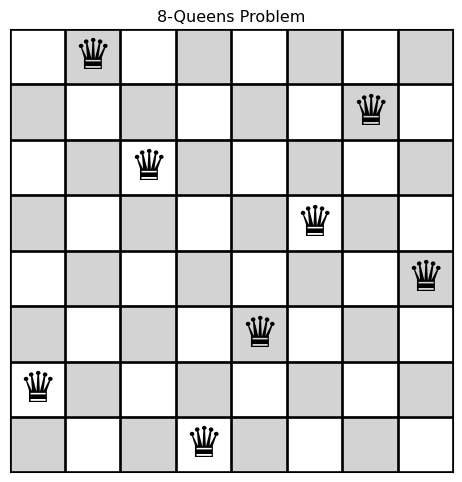

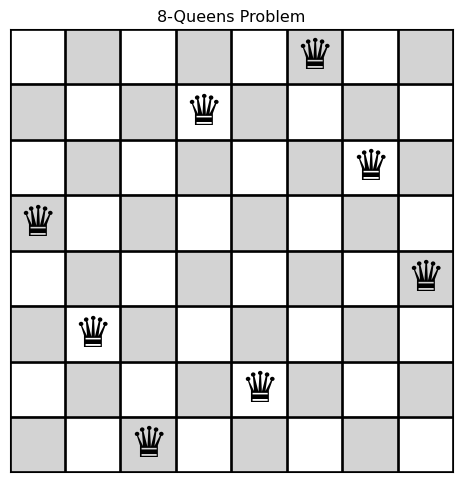

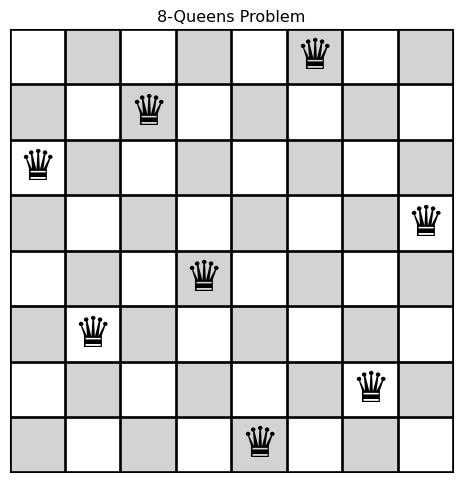

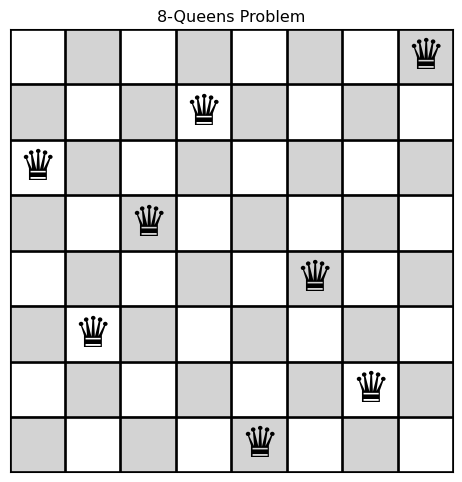

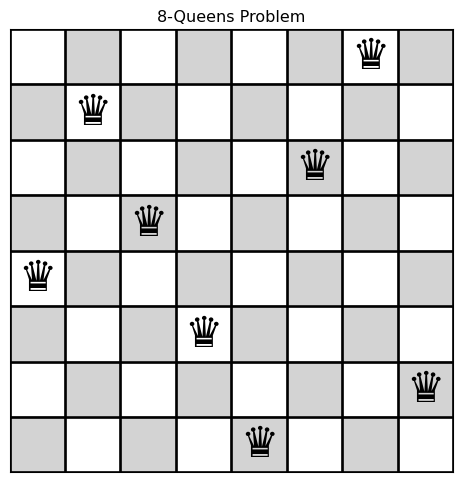

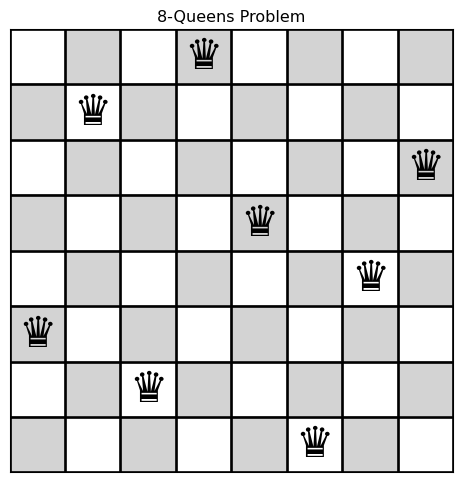

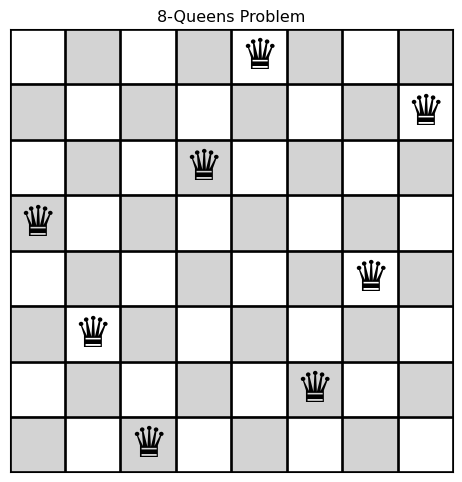

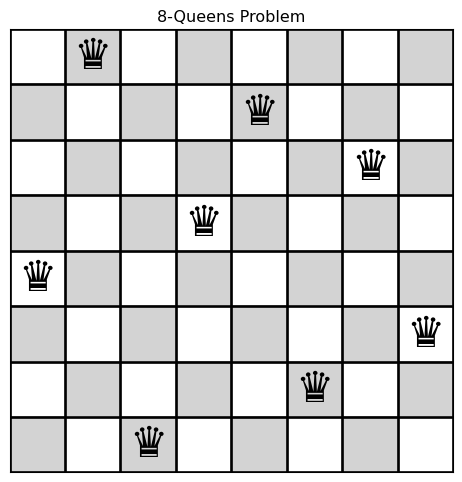

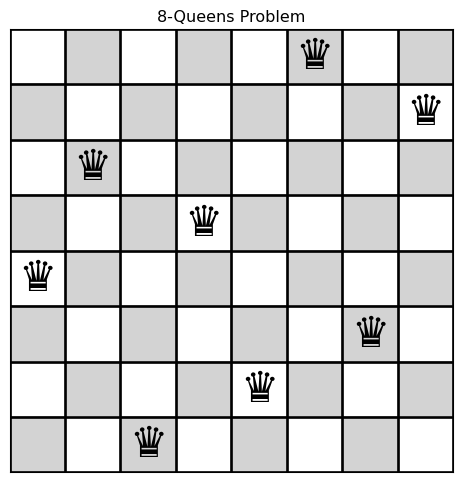

10 runs, number of solutions = 9, 0 duplicate(s)

## Solve (2)

1000 runs, number of solutions = 704, 92 unique solutions

## Solve 40-Queens

$40! = 8.1591528325 \times 10^{47}$

. . .

10 runs, number of solutions = 6, 6 unique solutions

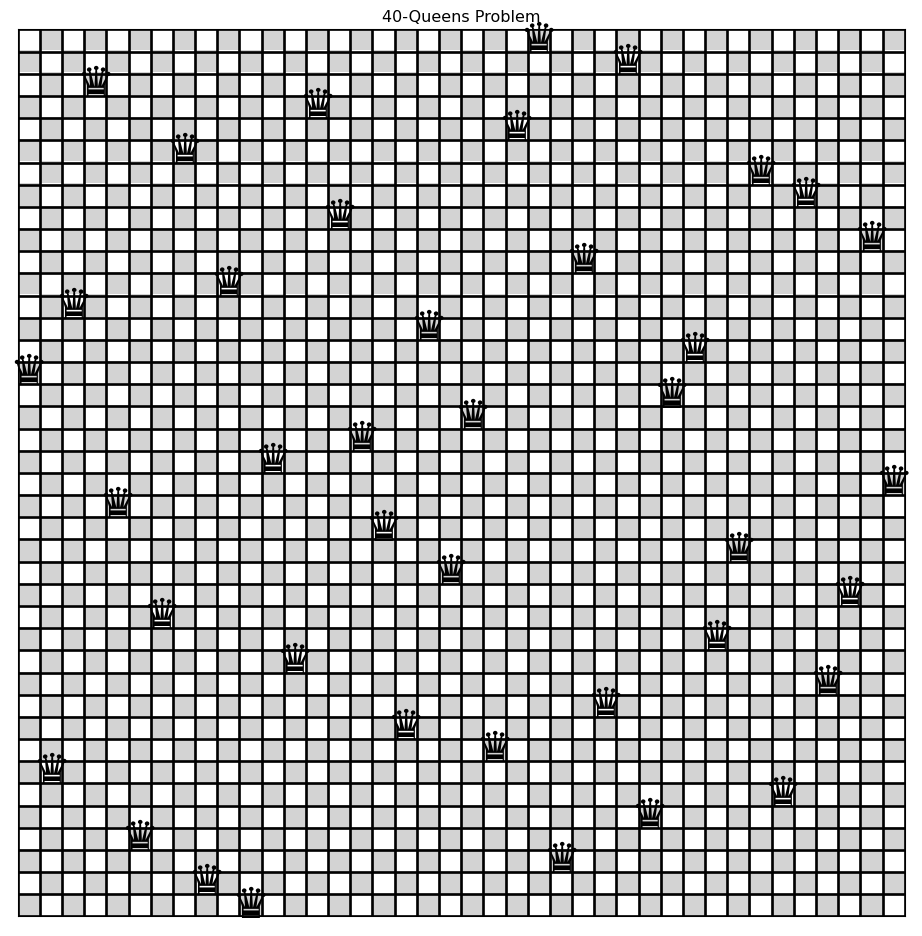

Elapsed time: 31.0419 seconds

## Iterations and Side Moves

1000 runs, number of solutions = 704, 92 unique solutions

/var/folders/gh/zd7z03rs5dj7q_df5gz5jlmh0000gp/T/ipykernel_31780/2749126315.py:20: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


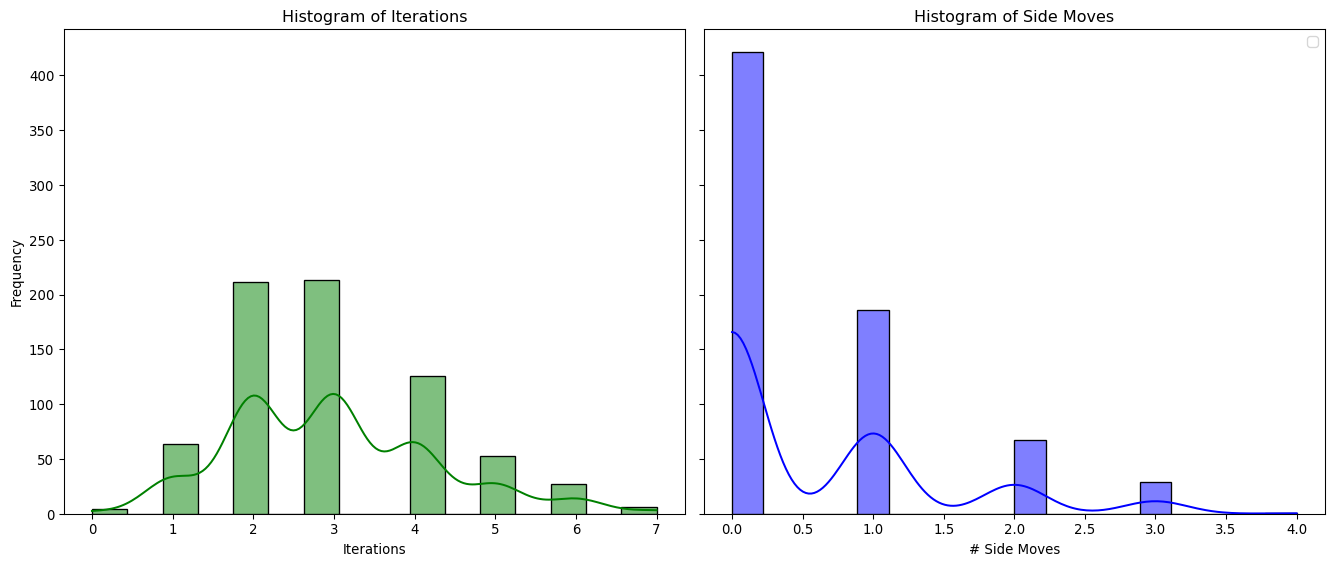

## 20-Queens

1000 runs, number of solutions = 566, 566 unique solutions

/var/folders/gh/zd7z03rs5dj7q_df5gz5jlmh0000gp/T/ipykernel_31780/2749126315.py:20: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


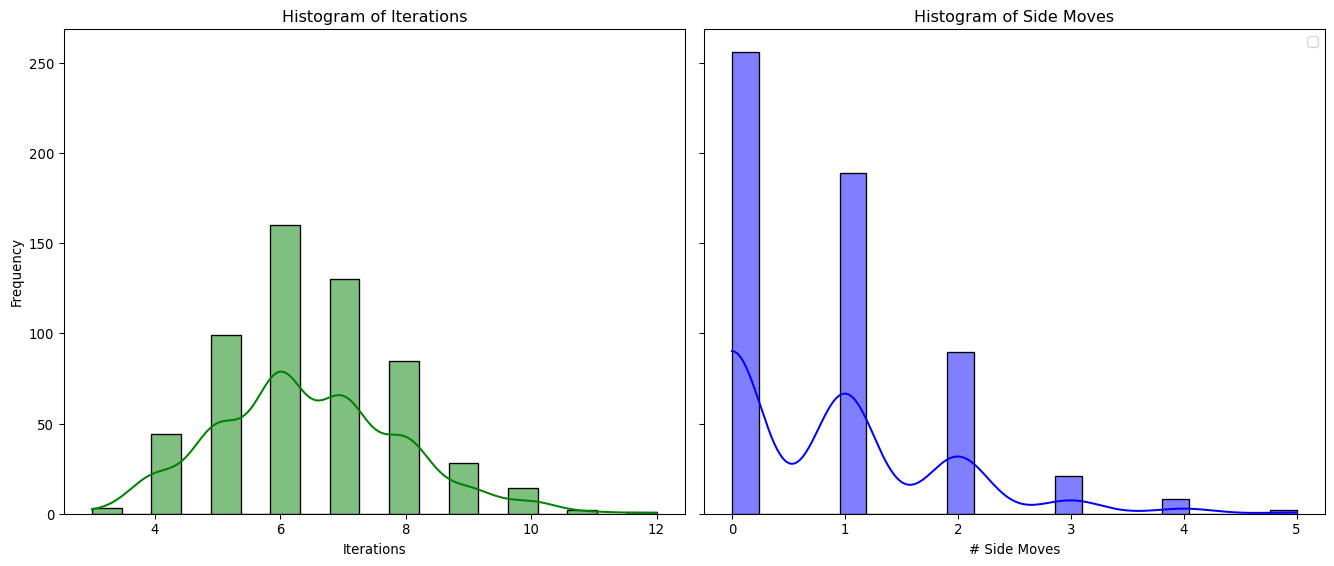

## Russell & Norvig

-   Hill climbing **gets stuck 86%** of the time.
    -   Successful attempts average 4 steps to a solution.
-   Permitting **100 lateral moves** boosts success rate from 14% to
    94%.
-   The problem space comprises $8^8 = 16,777,216$ states.
    -   Implementation from Russell & Norvig

Has many variants, including **random-restart hill climbing**.

In the implementation I proposed, there do not appear to be any local
minima. However, this requires further verification.

## Escaping a Local Optimum

What mechanisms would enable the **hill climbing** algorithm to escape
from a local optimum, whether it be a local minimum or maximum?

It needs to accept going downhill.

A random walk approach, which disregards the value of the objective
function, could theoretically locate the global maximum. However, this
method is highly impractical due to its extreme inefficiency.

## Remark

Assume the optimization problem is a **minimization task**, where the
goal is to find a solution with the **minimum cost**.

Downhill, gradient descent.

# Simulated Annealing

## Definition

**Simulated annealing** is an optimization algorithm inspired by the
annealing process in metallurgy. It probabilistically explores the
solution space by allowing **occasional uphill moves**, which helps
**escape local optima**. The algorithm **gradually reduces the
probability of accepting worse solutions** by lowering a “temperature”
parameter, ultimately converging towards an optimal or near-optimal
solution.

## Annealing

> ** (Russell and Norvig 2020, 114)**
>
> In **metallurgy**, **annealing** is the process used to temper or
> harden metals and glass by **heating them to a high temperature** and
> **then gradually cooling them**, thus allowing the material to reach a
> **low-energy crystalline state**.

The solid is heated to its melting point, causing the particles to
become randomly distributed.

Subsequently, the material is gradually cooled, allowing the particles
to reorganize into a low-energy state.

## Algorithm

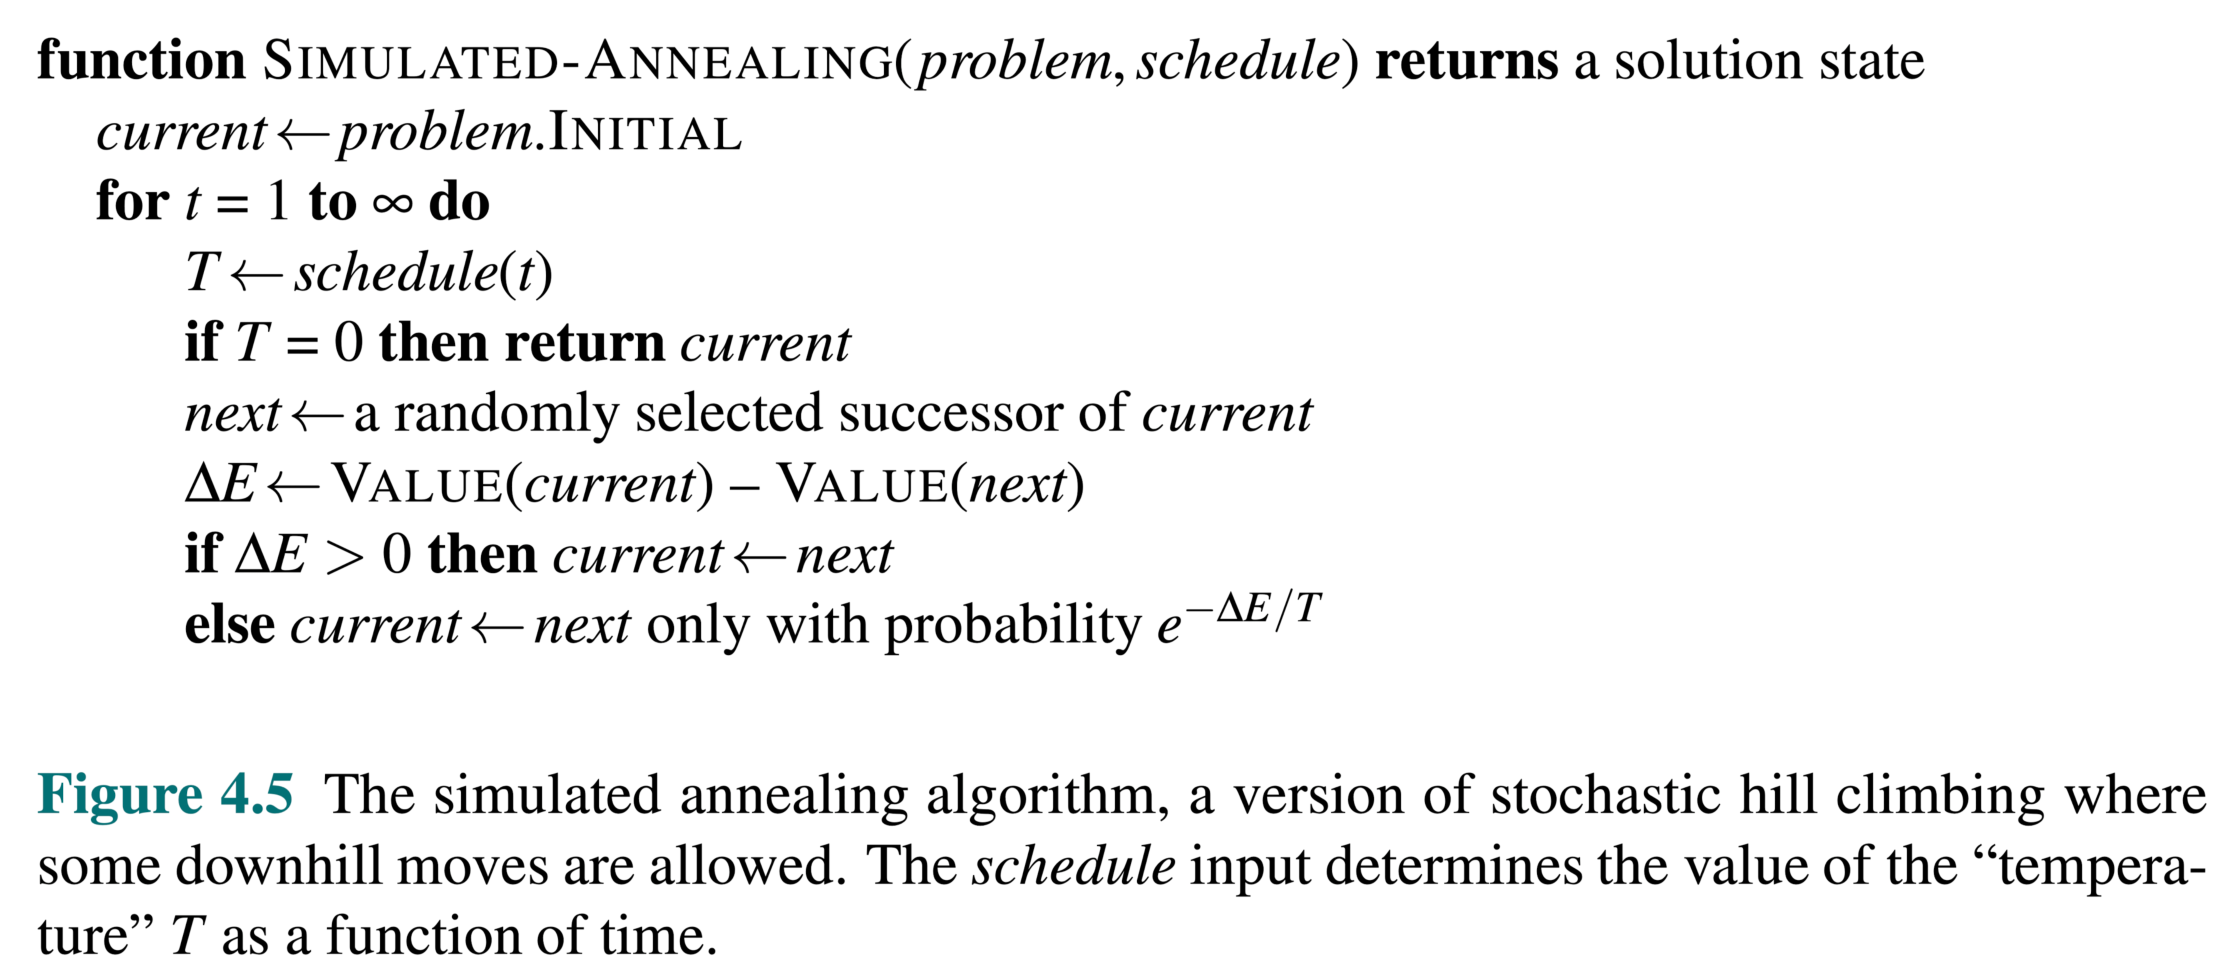

**Attribution**: (Russell and Norvig 2020, 115)

1.  This algorithm resembles hill climbing but differs by randomly
    selecting the next state rather than choosing the optimal move.

2.  If the move results in a lower objective function value, it is
    accepted unconditionally.

3.  Otherwise, acceptance is probabilistic, contingent on both
    $\Delta E$ and $T$.

## Varying $\Delta E$

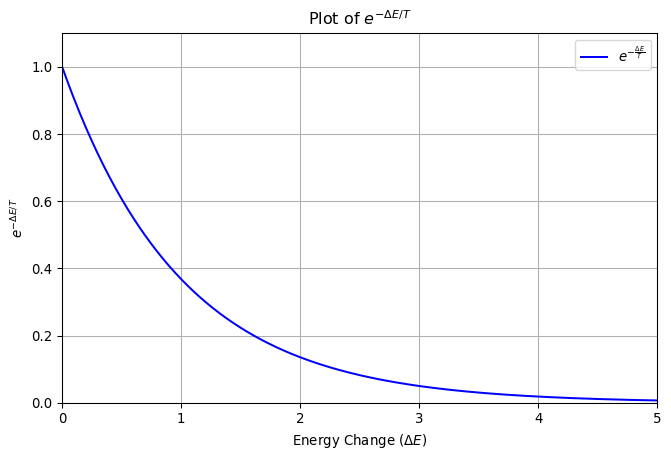

Moves resulting in **significant negative changes** (worse) to the
objective function are **less likely to be accepted**.

## Varying the temperature, $T$

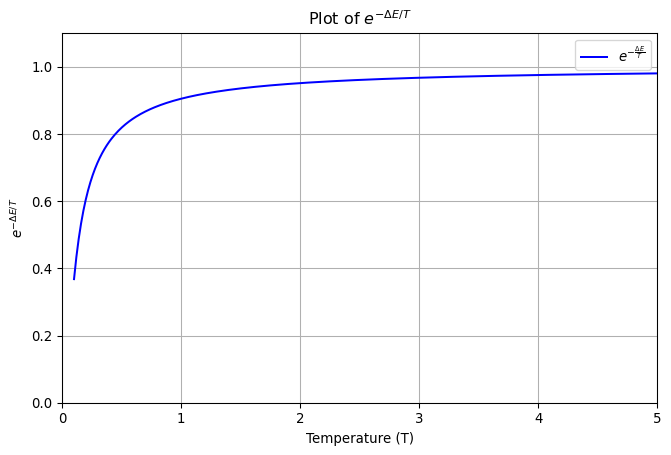

For a fixed $\Delta E$ (here $0.1$), changes are more likely to be
accepted whe $T$ is high, at the start of the algorithm.

## Varying the temperature and $\Delta E$

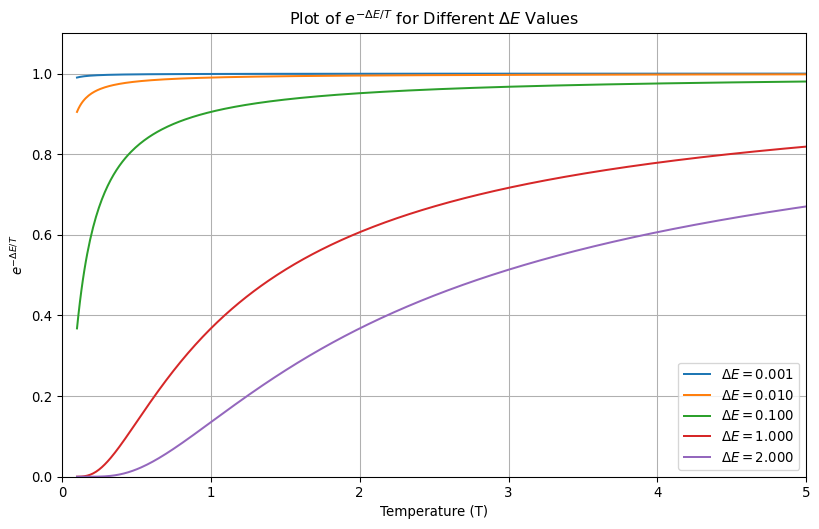

Bad moves are more likely to be accepted at the start when $T$ is high,
and less likely as $T$ decreases.

## Varying the temperature and $\Delta E$

In [ ]:
import { Inputs, Plot } from "@observablehq/plot"

viewof deltaE = Inputs.range([0.01, 100], {step: 0.01, value: 0.1, label: "ΔE", width: 300})

T_values = Array.from({length: 1000}, (_, i) => (i + 1) * 0.1)

function computeData(deltaE) {
  return T_values.map(T => ({
    T: T,
    value: Math.exp(-deltaE / T)
  }))
}

data = computeData(deltaE)

Plot.plot({
  marks: [
    Plot.line(data, {
      x: "T", 
      y: "value", 
      stroke: "steelblue", 
      strokeWidth: 2
    }),
    Plot.ruleX([0], {stroke: "black"}), // X-axis line
    Plot.ruleY([0], {stroke: "black"})  // Y-axis line
  ]
})

Using **[Observable JS](https://observablehq.com/plot/)**.

## Theory

> ** (Russell and Norvig 2020, 114)**
>
> If the schedule lowers $T$ to 0 slowly enough, then a property of the
> **Boltzmann** (aka **Gibbs**) distribution, $e^{\frac{\Delta E}{T}}$,
> is that all the probability is concentrated on the global maxima,
> which the algorithm will find with probability approaching 1.

## Definition

The **Travelling Salesman Problem (TSP)** is a classic optimization
problem that seeks the shortest possible route for a salesman to visit a
set of cities, returning to the origin city, while visiting each city
exactly once.

The challenge lies in determining the most efficient path, especially as
the number of cities increases, due to the combinatorial explosion of
possible routes.

## How to Represent a Solution?

. . .

We will use a **list** where each element represents the index of a
city, and the order of elements indicates the **sequence of city
visits**.

## Calculate the Total Distance

In [32]:
# Function to calculate the total distance of a given route

def calculate_total_distance(route, distance_matrix):

    total_distance = 0

    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i], route[i + 1]]

    total_distance += distance_matrix[route[-1], route[0]]  # Back to start

    return total_distance

## Generating a Neighboring Solution

**How** to generate a neighboring solution?

## Swap Two Cities

-   **Description**: Select two cities at random and swap their
    positions.
-   **Pros**: Simple and effective for exploring nearby solutions.
-   **Cons**: Change may be too small, potentially slowing down
    convergence.

## Reverse Segment

-   **Description**: Select two indices and reverse the segment between
    them.
-   **Pros**: More effective at finding shorter paths compared to simple
    swaps.
-   **Cons**: Can still be computationally expensive as the number of
    cities increases.

## Remove & Reconnect

-   **Description**: Removes three edges from the route and reconnects
    the segments in the best possible way. This can generate up to 7
    different routes.
-   **Pros**: Provides more extensive changes and can escape local
    optima more effectively than 2-opt.
-   **Cons**: More complex and computationally expensive to implement.

## Insertion Move

-   **Description**: Select a city and move it to a different position
    in the route.
-   **Pros**: Offers a balance between small and large changes, making
    it useful for fine-tuning solutions.
-   **Cons**: May require more iterations to converge to an optimal
    solution.

## Shuffle Subset

-   **Description**: Select a subset of cities in the route and randomly
    shuffle their order.
-   **Pros**: Introduces larger changes and can help escape local
    minima.
-   **Cons**: Can lead to less efficient routes if not handled
    carefully.

## Generating a Neighboring Solution

In [33]:
# Function to generate a random neighboring solution

def get_neighbor(route):

    a, b = np.random.randint(0, len(route), size=2)

    if a > b:
        a, b = b, a

    new_route = route.copy()
    new_route[a:b+1] = new_route[a:b+1][::-1]  # Reverse the segment between a and b
    
    return new_route

## `simulated_annealing`

In [34]:
def simulated_annealing(distance_matrix, initial_temp, cooling_rate, max_iterations):

    num_cities = len(distance_matrix)
    current_route = np.arange(num_cities)
    np.random.shuffle(current_route)
    current_cost = calculate_total_distance(current_route, distance_matrix)
    
    best_route = current_route.copy()
    best_cost = current_cost

    temperature = initial_temp

    for iteration in range(max_iterations):

        neighbor_route = get_neighbor(current_route)
        neighbor_cost = calculate_total_distance(neighbor_route, distance_matrix)
        
        # Accept the neighbor if it is better, or with a probability if it is worse.

        delta_E = neighbor_cost - current_cost

        if neighbor_cost < current_cost or np.random.rand() < np.exp(-(delta_E)/temperature):
            current_route = neighbor_route
            current_cost = neighbor_cost

            if current_cost < best_cost:
                best_route = current_route.copy()
                best_cost = current_cost

        # Cool down the temperature
        temperature *= cooling_rate

    return best_route, best_cost, temperatures, costs

## Remarks

-   As $t \to \infty$, the algorithm exhibits behavior characteristic of
    a **random walk**. During this phase, any neighboring state,
    regardless of whether it improves the objective function, is
    accepted. This facilitates exploration and occurs at the start of
    the algorithm’s execution.

## Remarks

-   Conversely, as $t \to 0$, the algorithm behaves like **hill
    climbing**. In this phase, only those states that enhance the
    objective function’s value are accepted, ensuring that the algorithm
    consistently moves towards optimal solutions—specifically, towards
    lower values in minimization problems. This phase emphasizes the
    exploitation of promising solutions and occurs towards the
    algorithm’s conclusion.

**See also**: [Properties of Simulated Annealing - Georgia Tech -
Machine Learning](https://youtu.be/enNgiWuIHAo). Udacity video (4m 10s).
Posted on 2015-02-23.

1.  **Exploration**:
    -   Exploration involves searching through a broad area of the
        search space to discover new possibilities, solutions, or
        information. The goal of exploration is to gather a diverse set
        of data points or solutions that could potentially lead to
        finding better global optima. It prevents the search process
        from getting trapped in local optima by encouraging the
        consideration of less-visited or unexplored regions of the
        search space.
    -   In algorithms, exploration can be implemented by introducing
        randomness, trying new or less-promising paths, or using
        strategies like simulated annealing or genetic algorithms that
        encourage diversity.
2.  **Exploitation**:
    -   Exploitation focuses on leveraging known information to refine
        and improve existing solutions. It involves concentrating the
        search effort around areas believed to contain high-quality
        solutions based on prior knowledge or experience. The goal is to
        optimize and fine-tune these solutions to achieve the best
        possible outcome in those regions.
    -   In algorithms, exploitation can be seen in strategies like hill
        climbing, gradient ascent/descent, or greedy algorithms, where
        the search is focused on local improvement and making
        incremental gains.

## Example

In [35]:
# Ensuring reproducibility

np.random.seed(42)

# Generate random coordinates for cities

num_cities = 20
coordinates = np.random.rand(num_cities, 2) * 100

# Calculate distance matrix

distance_matrix = np.sqrt(((coordinates[:, np.newaxis] - coordinates[np.newaxis, :]) ** 2).sum(axis=2))

# Run simulated annealing

initial_temp = 15
cooling_rate = 0.995
max_iterations = 1000

## Held–Karp Algorithm

-   **Introduced**: 1962 by Held, Karp, and independently by Bellman.
-   **Problem**: Solves the Traveling Salesman Problem (TSP) using
    **dynamic programming**.
-   **Time Complexity**: $\Theta(2^n n^2)$.
-   **Space Complexity**: $\Theta(2^n n)$.
-   **Efficiency**: Better than brute-force $\Theta(n!)$, yet still
    **exponential**.

Using Held–Karp to find the minimum cost of TSP tour: 386.43

Held and Karp (1962) and Bellman (1962)

## Execution

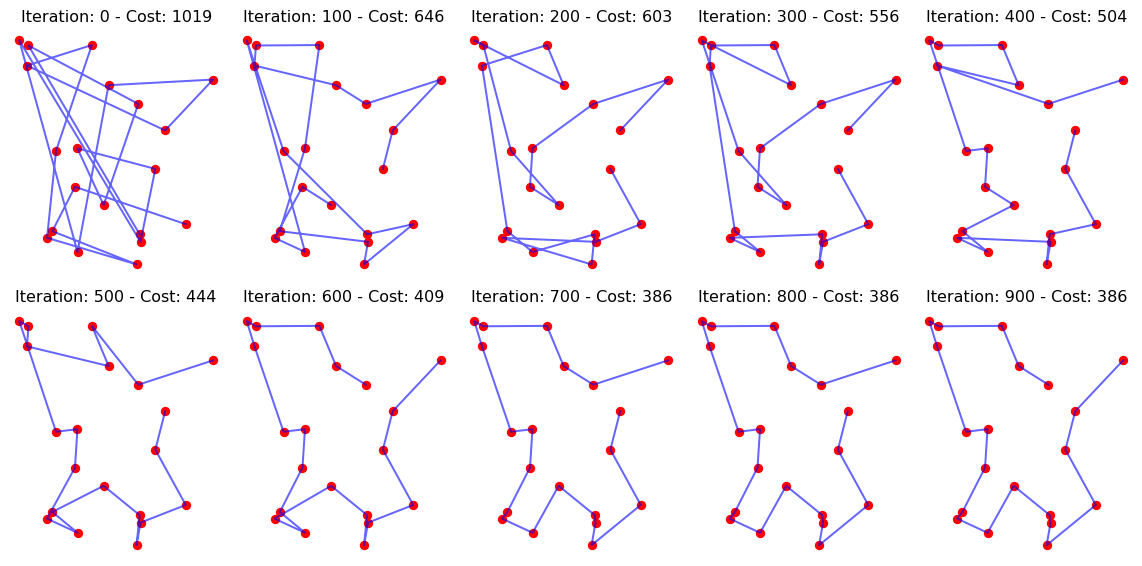

When I initially published these slides, the selected initial
temperature of 1000 was excessively high relative to the objective
function’s cost. By adjusting the initial temperature to 15, we achieve
a more effective balance between exploration and exploitation.

Due to the snapshots being captured every 100 iterations, the increases
in cost are not visible. This is illustrated on the “Temperature and
Cost” slide.

## Best Route

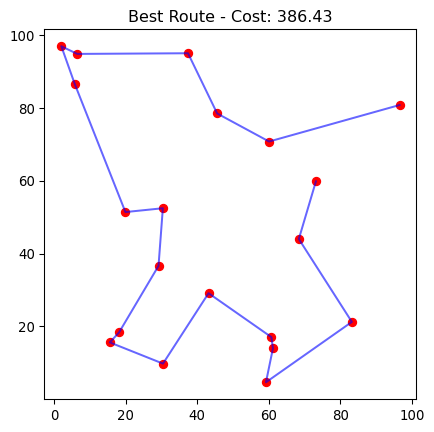

We have found an **optimal tour**!

## Temperature and Cost

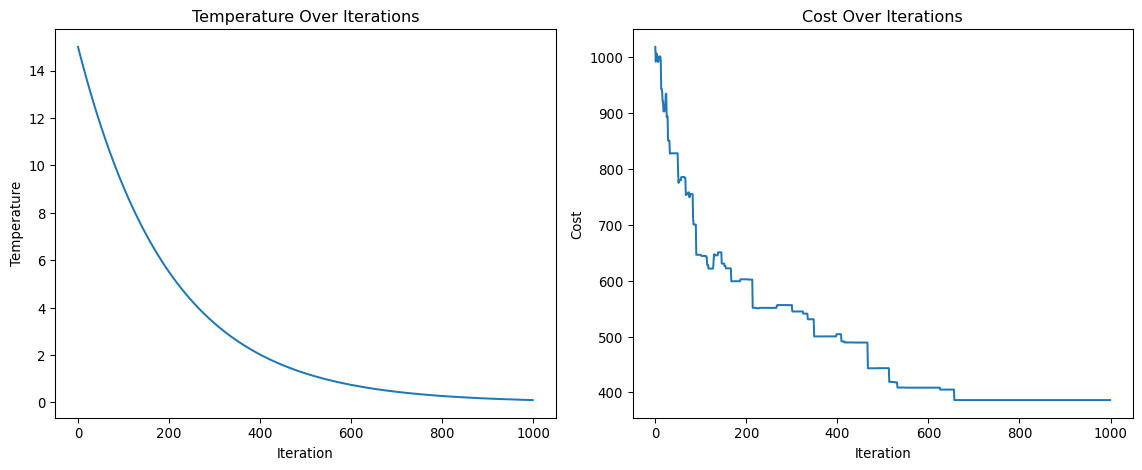

## Swapping Neighbors

-   **Description**: Select two cities at random, swap their positions.
-   **Pros**: Simple and effective for exploring nearby solutions.
-   **Cons**: Change may be too small, potentially slowing down
    convergence.

In [40]:
def get_neighbor_swap(route):
    a, b = np.random.randint(0, len(route), size=2)
    new_route = route.copy()
    new_route[a], new_route[b] = new_route[b], new_route[a]
    return new_route

## Execution

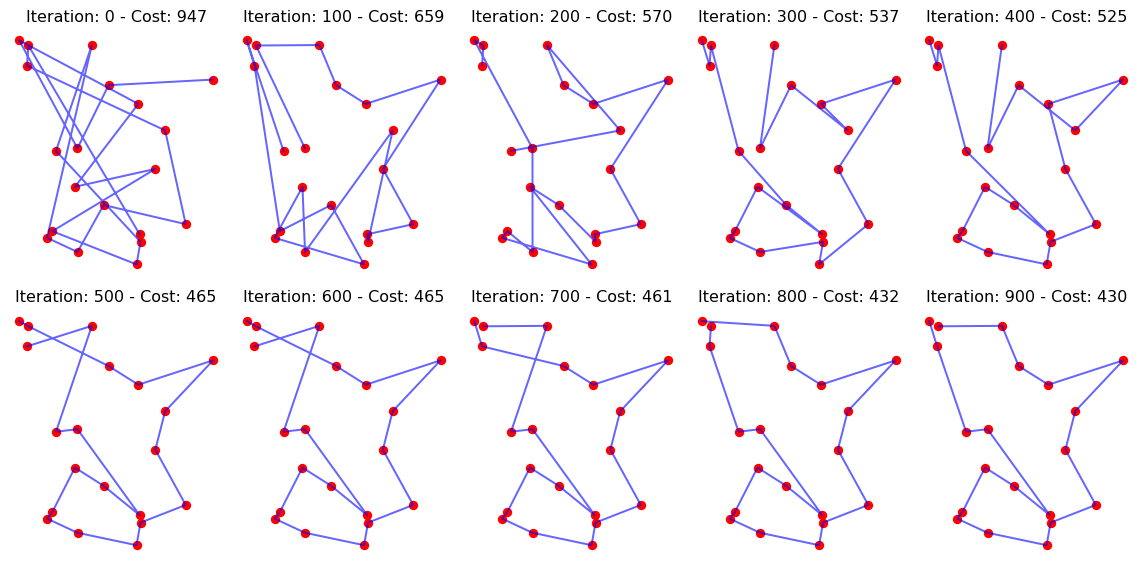

## Best Route

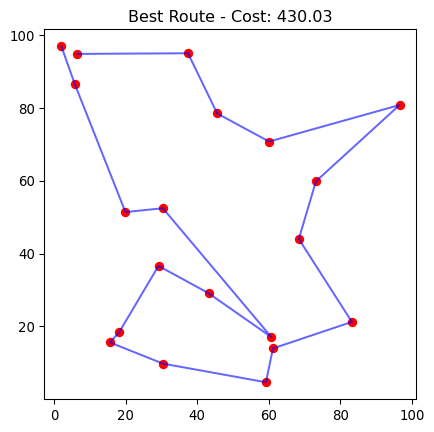

In this specific instance and for the given problem, **reverse segment**
(cost = 386.43) was more effective compared to **swapping neighbors**
(cost = 430.03).

## Temperature and Cost

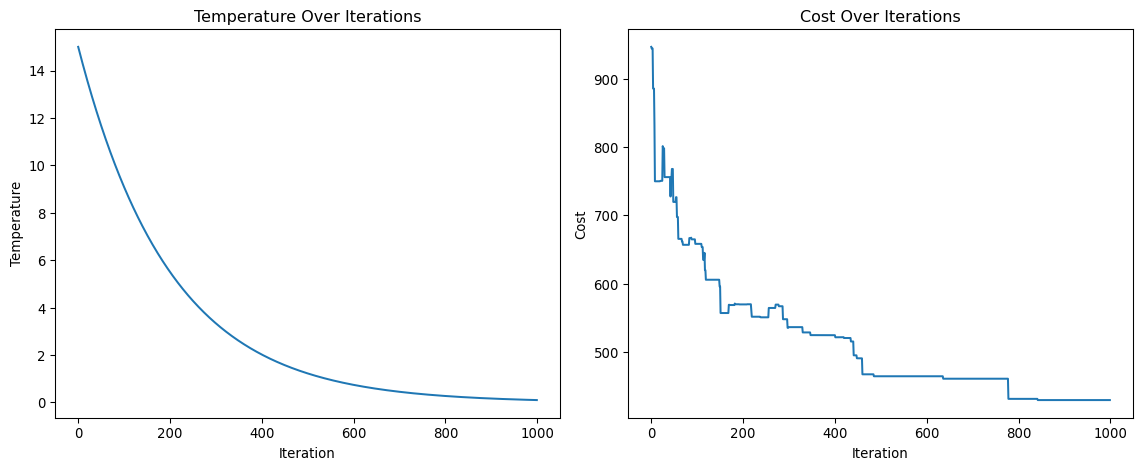

## Selecting a Neighborhood Strategy

-   **Simple Moves (Swap, Insertion)**: Effective for initial
    exploration; risk of local optima entrapment.

-   **Complex Moves**: Enhance capability to escape local optima and
    accelerate convergence; entail higher computational expense.

-   **Hybrid Approaches**: Integrate diverse strategies for neighborhood
    generation. Employ simple moves initially, transitioning to complex
    ones as convergence progresses.

## Initial Temperature

**Influence**: Since the probability of accepting a new state is given
by $e^{-\frac{\Delta E}{T}}$, the selection of the **initial
temperature** is directly influenced by $\Delta E$ and consequently by
the **objective function value for a random state**, $f(s)$.

## Initial Temperature

-   **Example Problems**: Consider two scenarios: problem $a$ with
    $f(a) = 1,000$ and problem $b$ with $f(b) = 100$.

-   **Energy Difference**: Accepting a state that is 10% worse results
    in energy differences $\Delta E = 0.1 \cdot f(a) = 100$ for problem
    $a$ and $\Delta E = 0.1 \cdot f(b) = 10$ for problem $b$.

-   **Acceptance Probability**: To accept such state 60% of the time,
    set $e^{-\frac{\Delta E}{T}} = 0.6$. Solving for $T$ yields initial
    temperatures of approximately $T \approx 195.8$ for problem $a$ and
    $T \approx 19.58$ for problem $b$.

## Initial Temperature

A **popular approach** is to set the initial temperature so that a
**significant portion of moves (often around 60-80%) are accepted**.

This can be done by running a preliminary phase where the temperature is
adjusted until the acceptance ratio stabilizes within this range.

Ben-Ameur (2004) suggests a more rigorous mathematical methodology.

## Cooling Strategies

In **simulated annealing**, cooling down is essential for managing
algorithm convergence. The cooling schedule dictates the rate at which
the temperature decreases, affecting the algorithm’s capacity to
**escape local optima** and **converge towards a near-optimal
solution**.

Nourani and Andresen (1998) and Alex, Simon, and Samuel (2017)

## Linear Cooling

-   **Description**: The temperature decreases linearly with each
    iteration.
-   **Formula**: $T = T_0 - \alpha \cdot k$
    -   $T_0$: Initial temperature
    -   $\alpha$: A constant decrement
    -   $k$: Current iteration
-   **Pros**: Simple to implement and understand.
-   **Cons**: Often leads to **premature convergence** because the
    temperature decreases too quickly.

In [44]:
temperature = initial_temp - alpha * iteration

## Geometric (Exponential) Cooling

-   **Description**: The temperature decreases exponentially with each
    iteration.
-   **Formula**: $T = T_0 \cdot \alpha^k$
    -   $\alpha$: Cooling rate, typically between 0.8 and 0.99
    -   $k$: Current iteration
-   **Pros**: Widely used due to its simplicity and effectiveness.
-   **Cons**: The choice of $\alpha$ is critical; if it’s too small, the
    temperature drops too fast, and if it’s too large, convergence can
    be slow.

In [45]:
temperature = initial_temp * (cooling_rate ** iteration)

## Logarithmic Cooling

-   **Description**: The temperature decreases slowly following a
    logarithmic function.
-   **Formula**: $T = \frac{\alpha \cdot T_0}{\log(1+k)}$
    -   $\alpha$: A scaling constant
    -   $k$: Current iteration
-   **Pros**: Provides a slower cooling rate, which is useful for
    problems that require extensive exploration of the solution space.
-   **Cons**: Convergence can be very slow, requiring many iterations.

In [46]:
temperature = alpha * initial_temp / (np.log(1 + iteration))

## Inverse Cooling

-   **Description**: The temperature decreases as an inverse function of
    the iteration number.
-   **Formula**: $T = \frac{T_0}{1+\alpha \cdot K}$
    -   $\alpha$: A scaling constant
    -   $k$: Current iteration
-   **Pros**: Allows for a more controlled cooling process, balancing
    exploration and exploitation.
-   **Cons**: May require careful tuning of $\alpha$ to be effective.

In [47]:
temperature = initial_temp / (1 + alpha * iteration)

## Adaptive Cooling

-   **Description**: The cooling schedule is adjusted dynamically based
    on the performance of the algorithm.
-   **Strategy**: If the algorithm is not making significant progress,
    the cooling rate may be slowed down. Conversely, if progress is
    steady, the cooling rate can be increased.
-   **Pros**: More flexible and can adapt to the characteristics of the
    problem.
-   **Cons**: More complex to implement and requires careful design to
    avoid instability.

In [48]:
if no_significant_change_in_cost:
    temperature *= 0.99  # Slow down cooling
else:
    temperature *= 0.95  # Speed up cooling

## Cooling Schedule - Summary

/var/folders/gh/zd7z03rs5dj7q_df5gz5jlmh0000gp/T/ipykernel_31780/723300194.py:14: RuntimeWarning:

divide by zero encountered in scalar divide


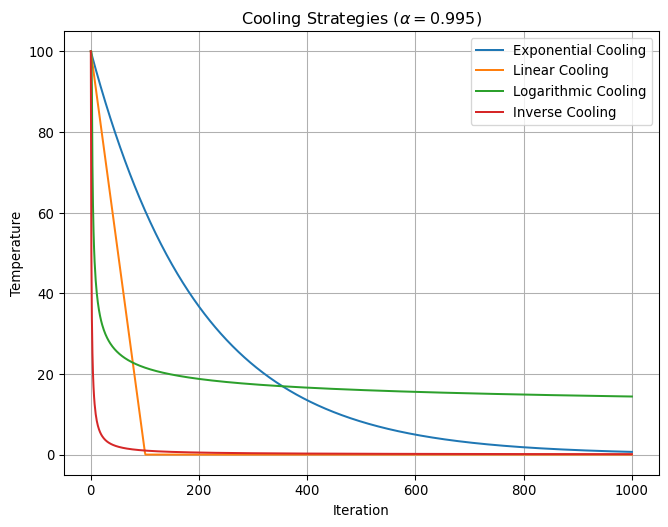

**See also**: [Effective Simulated Annealing with
Python](https://nathanrooy.github.io/posts/2020-05-14/simulated-annealing-with-python/)
by Nathan A. Rooy.

## Choosing the Right Cooling Schedule

-   **Problem-Specific**: The choice of cooling schedule often depends
    on the characteristics of the problem being solved. Some problems
    benefit from a slower cooling rate, while others may need faster
    convergence.

-   **Experimentation**: It’s common to experiment with different
    strategies and parameters to find the best balance between
    exploration (searching broadly) and exploitation (refining the
    current best solutions).

## Conclusion

After applying **simulated annealing**, a **local search** method such
as **hill climbing** can be used to **refine the solution**.

. . .

**Simulated annealing** is effective for exploring the solution space
and **avoiding local minima**, while **local search** focuses on the
**exploration of neighboring solutions**.

## Simulated Annealing Visualization

<https://youtu.be/NPE3zncXA5s?si=Z9rk2Kt_5pN8ChlA>

**Attribution:**
[ComputationalScientist](https://www.youtube.com/@computationalscientist6368),
Posted on 2018-01-06.

# Prologue

## Summary

-   Local search algorithms focus on finding goal states by moving
    between neighboring states without tracking paths.
-   The hill-climbing algorithm seeks the highest-valued neighbor but
    can get stuck in local maxima or plateaus.
-   Effective state representation, such as using permutations in the
    8-Queens problem, avoids illegal placements and improves
    performance.
-   Simulated annealing allows occasional uphill moves to escape local
    optima, controlled by a decreasing temperature parameter.
-   The acceptance probability in simulated annealing decreases as
    temperature lowers and energy difference increases.
-   Simulated annealing effectively solves complex problems like the
    Travelling Salesman Problem by probabilistically exploring the
    solution space.

## Further Readings

![](https://media.springernature.com/full/springer-static/cover-hires/book/978-3-319-91086-4?as=webp.png)

“The overall SA \[simulated annealing\] methodology is then deployed in
detail on a real-life application: a **large-scale aircraft trajectory
planning problem involving nearly 30,000 flights** at the European
continental scale.”

(Gendreau and Potvin 2019, chap. 1)

Gendreau and Potvin (2019), [access via Springer
Link](https://link.springer.com/book/10.1007/978-3-319-91086-4).

Did you know that you can freely access the entire collection of books
from Springer? By using a device connected to a uOttawa IP address and
visiting [Springer Link](https://link.springer.com), you have the
ability to download books in either PDF or EPUB format.

The book is co-edited by [Jean-Yves
Potvin](https://recherche.umontreal.ca/english/our-researchers/professors-directory/researcher/is/in14464/)
and [Michel
Gendreau](https://www.polymtl.ca/expertises/en/gendreau-michel).
[Jean-Yves
Potvin](https://recherche.umontreal.ca/english/our-researchers/professors-directory/researcher/is/in14464/)
serves as a professor at the Université de Montréal, while [Michel
Gendreau](https://www.polymtl.ca/expertises/en/gendreau-michel) holds a
professorship at École Polytechnique de Montréal.

## Next lecture

-   We will discuss population-based algorithms.

## References

Alex, Kwaku Peprah, Kojo Appiah Simon, and Kwame Amponsah Samuel. 2017.
“<span class="nocase">An Optimal Cooling Schedule Using a Simulated
Annealing Based Approach</span>.” *Applied Mathematics* 08 (08):
1195–1210. <https://doi.org/10.4236/am.2017.88090>.

Bellman, Richard. 1962. “<span class="nocase">Dynamic Programming
Treatment of the Travelling Salesman Problem</span>.” *Journal of the
ACM (JACM)* 9 (1): 61–63. <https://doi.org/10.1145/321105.321111>.

Ben-Ameur, Walid. 2004. “<span class="nocase">Computing the Initial
Temperature of Simulated Annealing</span>.” *Computational Optimization
and Applications* 29 (3): 369–85.
<https://doi.org/10.1023/b:coap.0000044187.23143.bd>.

Gendreau, M., and J. Y. Potvin. 2019. *Handbook of Metaheuristics*.
International Series in Operations Research & Management Science.
Springer International Publishing.
<https://books.google.com.ag/books?id=RbfFwQEACAAJ>.

Held, Michael, and Richard M. Karp. 1962. “A Dynamic Programming
Approach to Sequencing Problems.” *Journal of the Society for Industrial
and Applied Mathematics* 10 (1): 196–210.
<https://doi.org/10.1137/0110015>.

Nourani, Yaghout, and Bjarne Andresen. 1998. “A Comparison of Simulated
Annealing Cooling Strategies.” *Journal of Physics A: Mathematical and
General* 31 (41): 8373.

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa